Chart for listings_join_reviews

In [1]:
import json
import pandas as pd
import matplotlib.pyplot as plt
from collections import OrderedDict

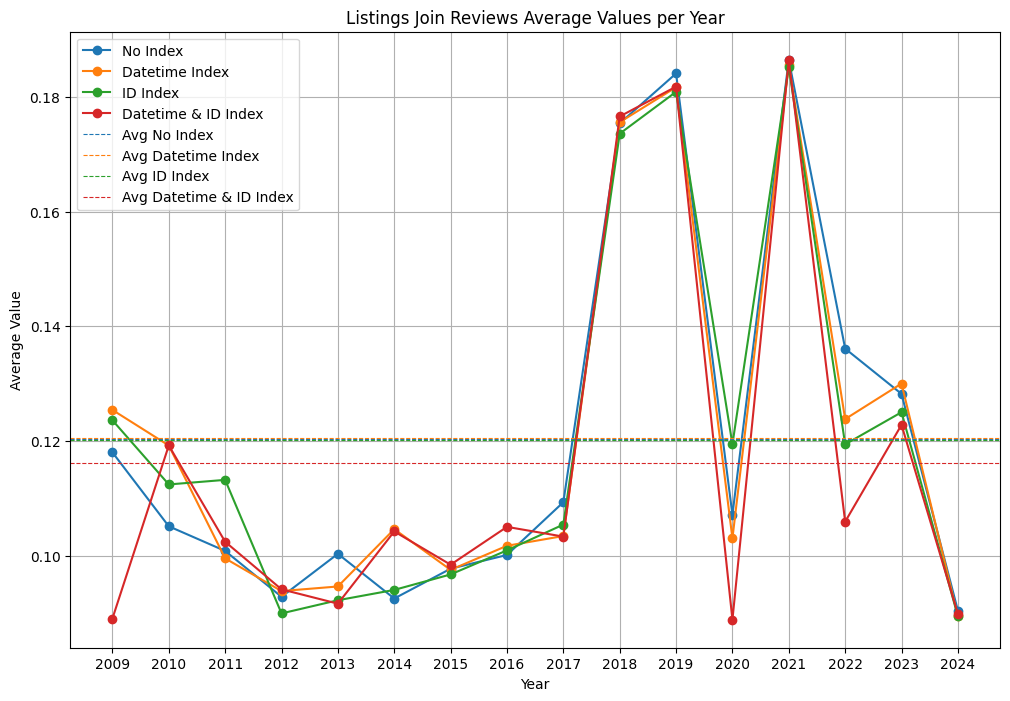

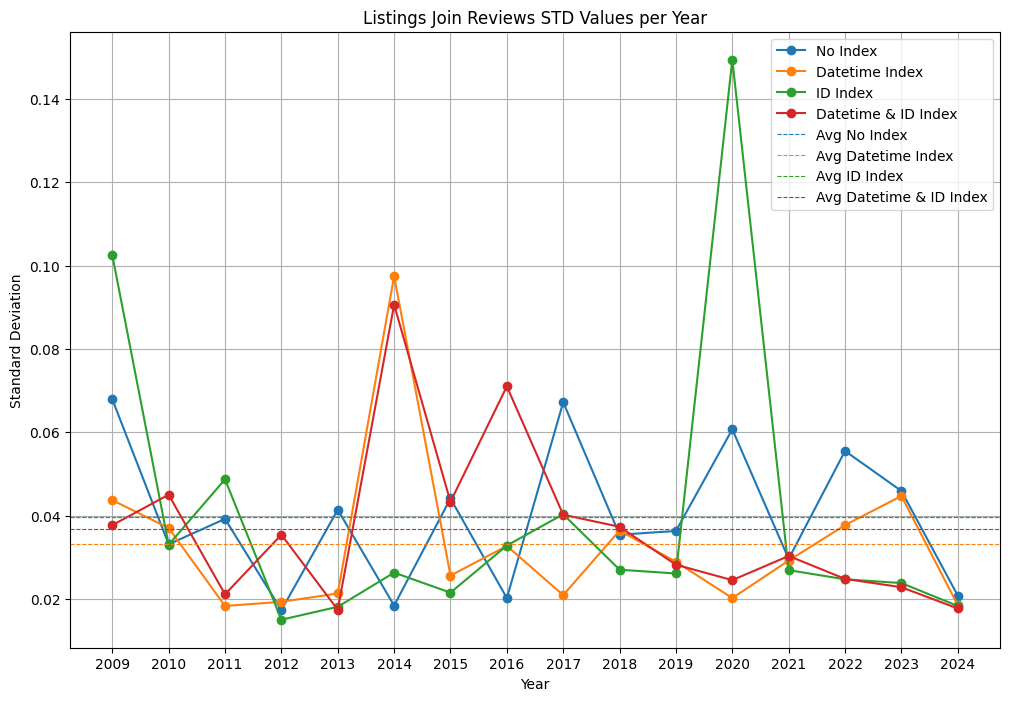

In [91]:
import matplotlib.pyplot as plt
import pandas as pd
import json

# Path to the JSON file
perf_summary_path = 'perf_data/listings_join_reviews.json'

# Load the data from the JSON file
with open(perf_summary_path, 'r') as file:
    data = json.load(file)

# Function to extract average or standard deviation values
def extract_values(data, metric):
    extracted_values = {}
    for year_key, year_data in data.items():
        year = year_key.split('_')[-1]  # Assumes format "listings_join_review_YYYY"
        extracted_values[year] = {}
        for test_condition, results in year_data.items():
            extracted_values[year][test_condition] = results[metric]
    return extracted_values

# Extracting average and standard deviation values
avg_values = extract_values(data, 'avg')
std_values = extract_values(data, 'std')

# Converting to DataFrame for easier plotting
def values_to_df(values, key_labels):
    data_for_df = {label: [] for label in key_labels.values()}
    data_for_df['Year'] = sorted(values.keys())
    
    for year in data_for_df['Year']:
        for key, label in key_labels.items():
            data_for_df[label].append(values[year].get(key, None))

    df = pd.DataFrame(data_for_df)
    df.set_index('Year', inplace=True)
    return df

# Mapping keys to custom labels
key_labels = {
    "__": "No Index",
    "__datetime_in_reviews__": "Datetime Index",
    "__id_in_listings__": "ID Index",
    "__datetime_in_reviews__id_in_listings__": "Datetime & ID Index"
}

# Function to plot with a horizontal line for the average
def plot_with_average(df, title, ylabel):
    plt.figure(figsize=(12, 8))
    lines = []  # To store the plotted lines for color matching
    for label in key_labels.values():
        line, = plt.plot(df.index, df[label], marker='o', label=label)
        lines.append(line)  # Store each line to match colors for the average lines

    # Add average lines
    for line, label in zip(lines, key_labels.values()):
        if label in df.columns:
            overall_avg = df[label].mean()
            plt.axhline(y=overall_avg, color=line.get_color(), linestyle='--', linewidth=0.8, label=f'Avg {label}')

    plt.title(title)
    plt.xlabel('Year')
    plt.ylabel(ylabel)
    plt.legend()
    plt.grid(True)
    plt.show()

# Creating DataFrames
df_avg = values_to_df(avg_values, key_labels)
df_std = values_to_df(std_values, key_labels)

# Plotting average values per year with a horizontal line for the overall average
plot_with_average(df_avg, 'Listings Join Reviews Average Values per Year', 'Average Value')

# Plotting standard deviation values per year with a horizontal line for the overall average
plot_with_average(df_std, 'Listings Join Reviews STD Values per Year', 'Standard Deviation')


For 3b charting

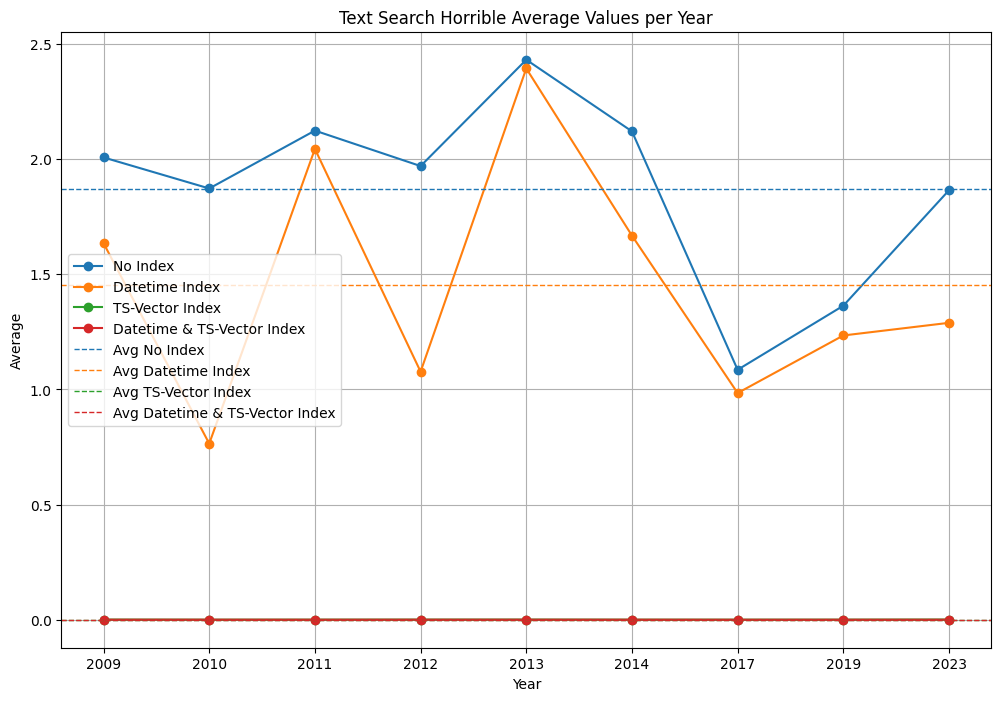

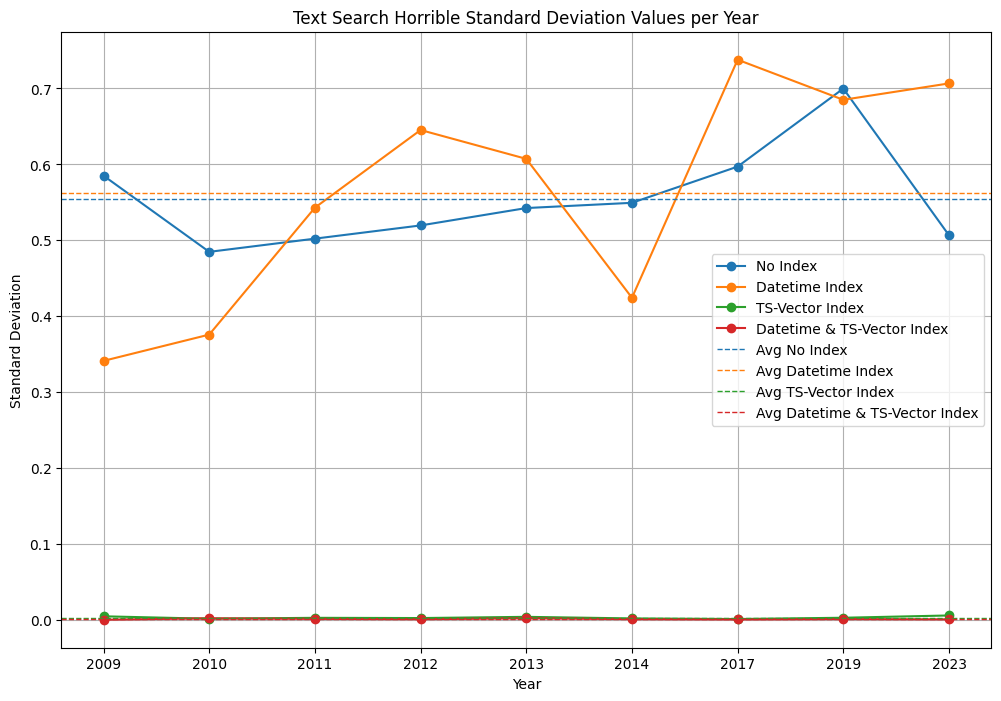

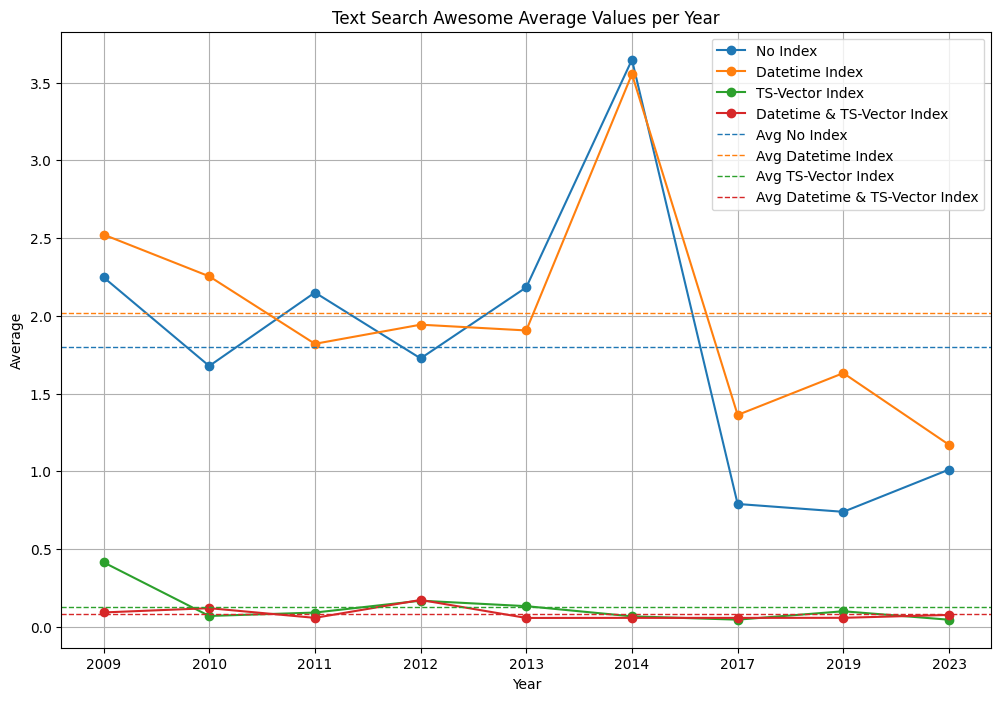

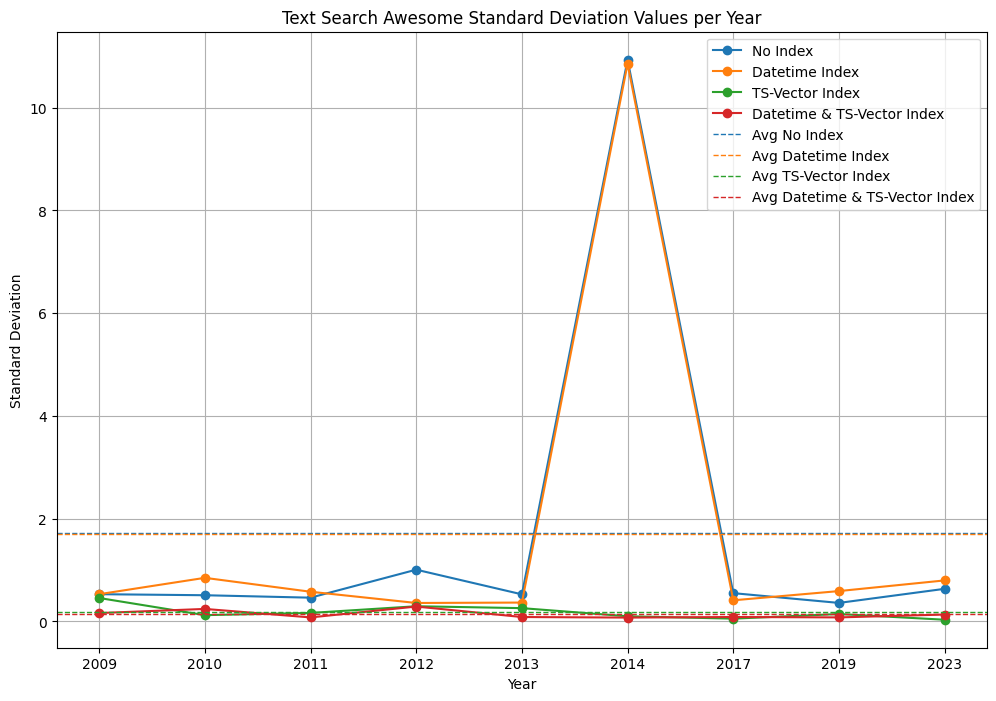

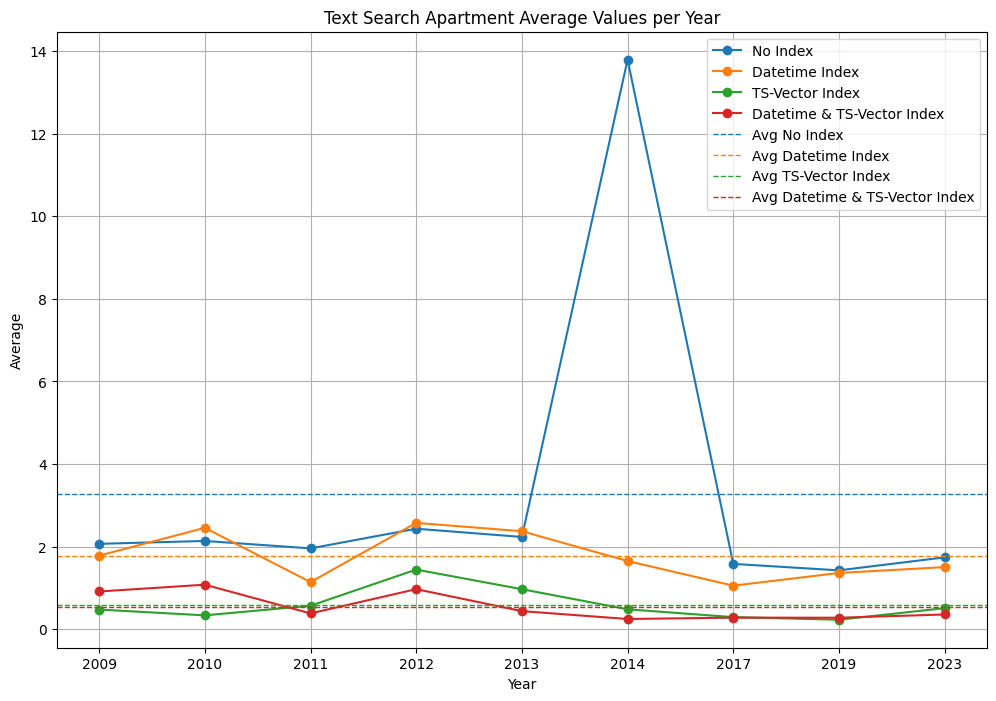

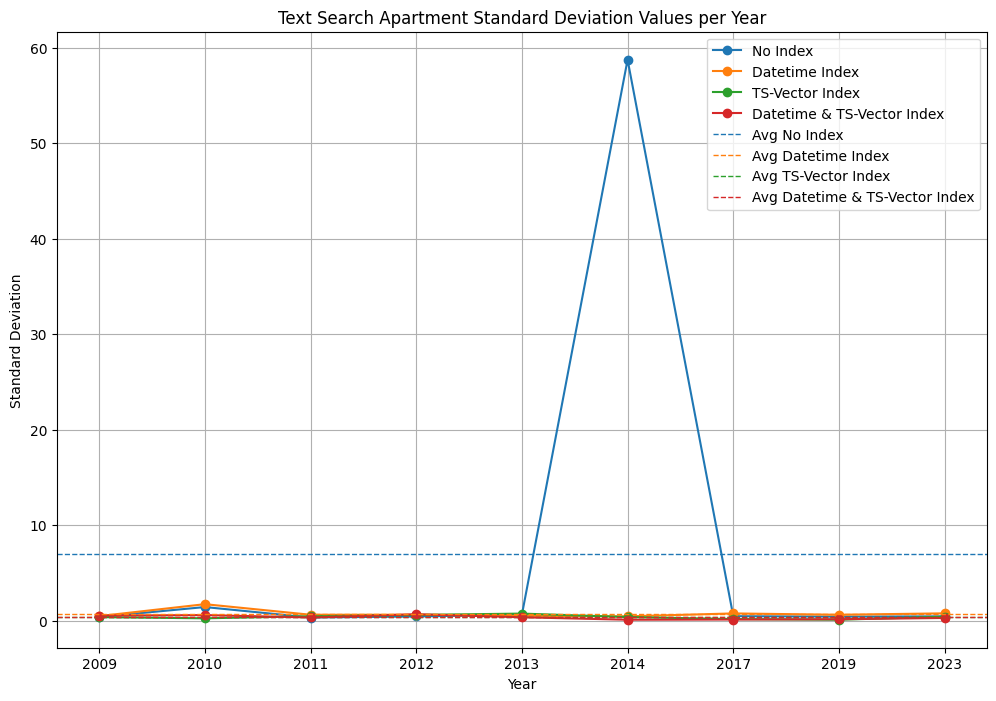

In [92]:
# Path to the JSON file
perf_summary_path = 'perf_data/text_search_query.json'

# Load the data from the JSON file
with open(perf_summary_path, 'r') as file:
    data = json.load(file)

# Function to extract average or standard deviation values
def extract_values(data, term, metric):
    extracted_values = {}
    for year_key, year_data in data.items():
        if term in year_key:  # filter data for the specific term
            year = year_key.split('_')[-1]  # Assumes format "term_year"
            extracted_values[year] = {}
            for test_condition, results in year_data.items():
                extracted_values[year][test_condition] = results[metric]
    return extracted_values

# Function to convert extracted values to DataFrame
def values_to_df(values, key_labels):
    data_for_df = {label: [] for label in key_labels.values()}
    data_for_df['Year'] = sorted(values.keys(), key=int)  # Ensure years are sorted numerically
    
    for year in data_for_df['Year']:
        for key, label in key_labels.items():
            data_for_df[label].append(values[year].get(key, None))
    
    df = pd.DataFrame(data_for_df)
    df.set_index('Year', inplace=True)
    return df

# Key labels for each index condition
key_labels = {
    "__": "No Index",
    "__datetime_in_reviews__": "Datetime Index",
    "__comments_tsv_in_reviews__": "TS-Vector Index",
    "__datetime_in_reviews__comments_tsv_in_reviews__": "Datetime & TS-Vector Index"
}

# Plotting function for average or STD values with colored average lines
def plot_values(term, df, value_type):
    plt.figure(figsize=(12, 8))
    lines = []  # To capture the lines for color
    for label in key_labels.values():
        if label in df.columns:
            line, = plt.plot(df.index, df[label], marker='o', label=label)
            lines.append(line)  # Append line to match the color later

    # Adding average lines with corresponding colors
    for line, label in zip(lines, key_labels.values()):
        if label in df.columns:
            overall_avg = df[label].mean()
            plt.axhline(y=overall_avg, color=line.get_color(), linestyle='--', linewidth=1, label=f'Avg {label}')

    plt.title(f'Text Search {term.capitalize()} {value_type} Values per Year')
    plt.xlabel('Year')
    plt.ylabel(value_type)
    plt.legend()
    plt.grid(True)
    plt.show()

# Extract and plot data for each search term and metric
terms = ['horrible', 'awesome', 'apartment']
metrics = ['avg', 'std']
for term in terms:
    for metric in metrics:
        values = extract_values(data, term, metric)
        df = values_to_df(values, key_labels)
        plot_values(term, df, 'Average' if metric == 'avg' else 'Standard Deviation')


Step 3c 

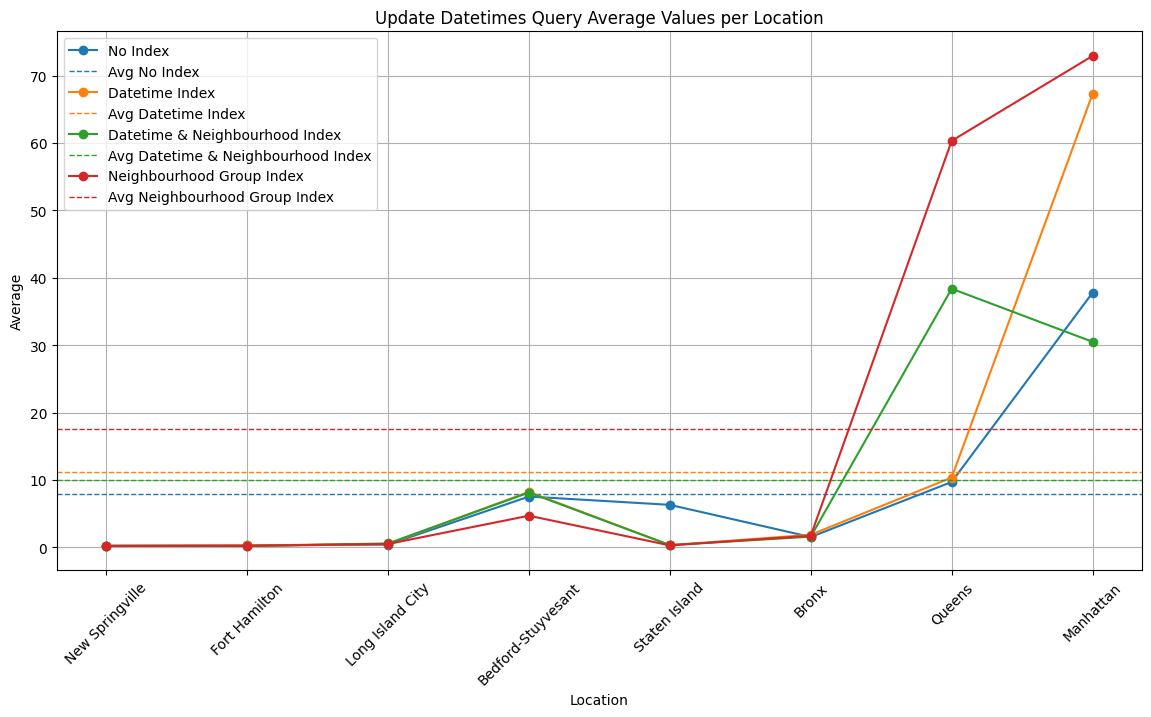

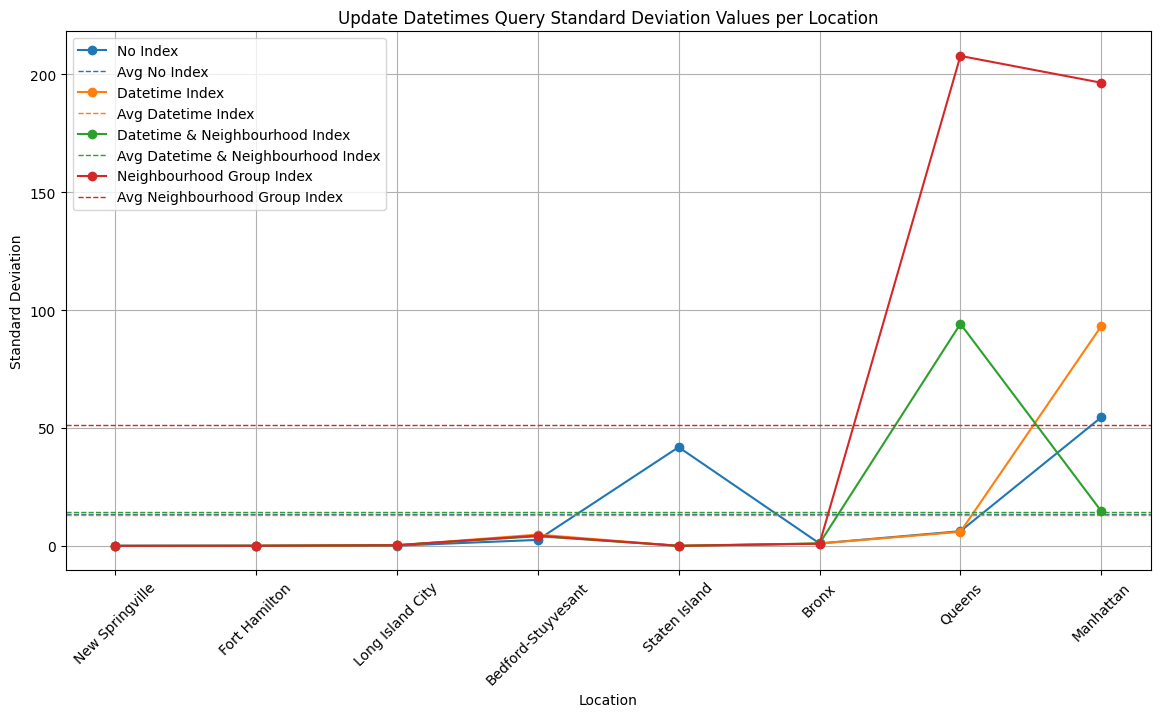

In [102]:
import matplotlib.pyplot as plt
import pandas as pd
import json

# Path to the JSON file
perf_summary_path = 'perf_data/update_datetimes_query.json'

# Load the data from the JSON file
with open(perf_summary_path, 'r') as file:
    data = json.load(file)

def extract_values(data, metric):
    extracted_values = {}
    for location_key, location_data in data.items():
        location = location_key.replace('update_datetimes_neigh_', '').replace('_', ' ')
        extracted_values[location] = {}
        for condition, results in location_data.items():
            extracted_values[location][condition] = results[metric]
    return extracted_values

location_order = [
    'New Springville', 'Fort Hamilton', 'Long Island City', 'Bedford-Stuyvesant',
    'Staten Island', 'Bronx',  'Queens', 'Manhattan'
]

def values_to_df(values, order):
    ordered_data = {key: values[key] for key in order if key in values}
    data_for_df = {label: [] for label in next(iter(values.values())).keys()}
    data_for_df['Location'] = list(ordered_data.keys())
    
    for location in data_for_df['Location']:
        for key in data_for_df.keys():
            if key != 'Location':
                data_for_df[key].append(ordered_data[location].get(key, None))
    
    df = pd.DataFrame(data_for_df)
    df.set_index('Location', inplace=True)
    return df

key_labels = {
    "__": "No Index",
    "__datetime_in_reviews__": "Datetime Index",
    "__neighbourhood_in_listings__": "Neighbourhood Index",
    "__neigh_in_listings__": "Neighbourhood Group Index",
    "__datetime_in_reviews__neigh_in_listings__": "Datetime & Neighbourhood Index",
}

def plot_values(df, value_type):
    plt.figure(figsize=(14, 7))
    for column in df.columns:
        if column in key_labels:
            plt.plot(df.index, df[column], marker='o', linestyle='-', label=key_labels[column])
            # Calculate and plot the average line for this column
            avg_val = df[column].mean()
            plt.axhline(y=avg_val, color=plt.gca().lines[-1].get_color(), linestyle='--', linewidth=1, label=f'Avg {key_labels[column]}')

    plt.title(f'Update Datetimes Query {value_type} Values per Location')
    plt.xlabel('Location')
    plt.ylabel(value_type)
    plt.xticks(rotation=45)
    plt.legend()
    plt.grid(True)
    plt.show()

avg_values = extract_values(data, 'avg')
std_values = extract_values(data, 'std')

df_avg = values_to_df(avg_values, location_order)
df_std = values_to_df(std_values, location_order)

plot_values(df_avg, 'Average')
plot_values(df_std, 'Standard Deviation')
